Que. 2

Perform K-Means,Hierarchical and DBSCAN Clustering for the crime_data.csv data and identify the number of clusters formed and Visualise the results.

Data Description:
Murder -- Muder rates in different places of United States<br>
Assualt- Assualt rate in different places of United States<br>
UrbanPop - urban population in different places of United States
<br>Rape - Rape rate in different places of United States

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [12]:
df.drop("Unnamed: 0",axis=1,inplace=True)

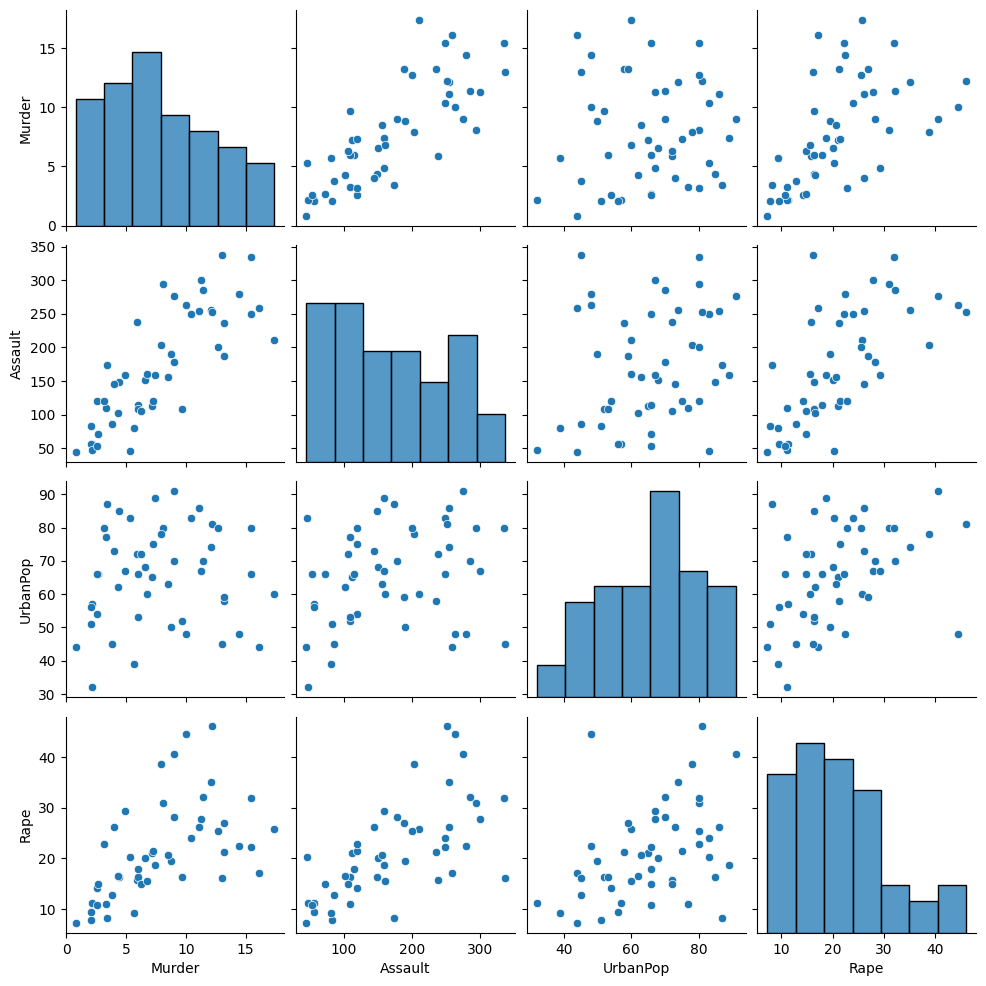

In [13]:
sns.pairplot(df)

In [25]:
from sklearn.cluster import KMeans

wss=[]

for k in range(2,10):
    kmeans=KMeans(n_clusters=k) 
    clusters_info=kmeans.fit(df)
    wss.append(clusters_info.inertia_)

In [26]:
wss

[96399.02814449917,
 47964.26535714285,
 37652.659523809525,
 27657.1608907563,
 19120.24,
 15910.129416666667,
 13329.361976190477,
 13520.197023809524]

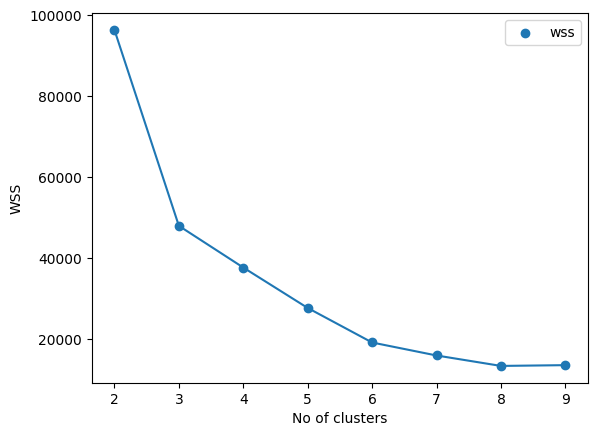

In [33]:
plt.scatter(range(2,10),wss,label='wss')
plt.plot(range(2,10),wss)
plt.xlabel("No of clusters")
plt.ylabel("WSS")
plt.legend()

## KMeans

In [42]:
kmeans=KMeans(n_clusters=3)
clusters_info=kmeans.fit(df)

In [43]:
clusters_info.labels_

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [44]:
clusters_info.cluster_centers_

array([[  4.27      ,  87.55      ,  59.75      ,  14.39      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714]])

In [45]:
len(clusters_info.cluster_centers_)

3

In [46]:
clusters_info.n_iter_

5

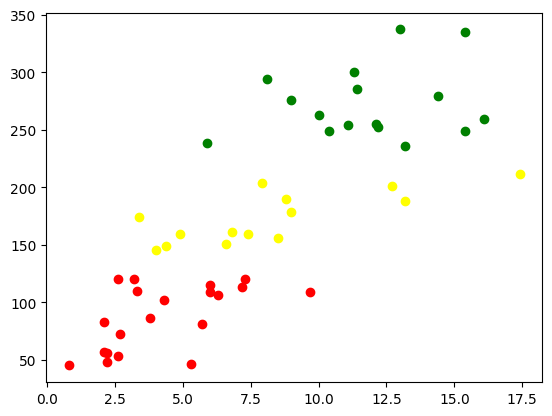

In [47]:
plt.scatter(df['Murder'][clusters_info.labels_==0],df['Assault'][clusters_info.labels_==0],color="red")
plt.scatter(df['Murder'][clusters_info.labels_==1],df['Assault'][clusters_info.labels_==1],color="green")
plt.scatter(df['Murder'][clusters_info.labels_==2],df['Assault'][clusters_info.labels_==2],color="yellow")
plt.scatter(df['Murder'][clusters_info.labels_==3],df['Assault'][clusters_info.labels_==3],color="purple")
plt.scatter(df['Murder'][clusters_info.labels_==4],df['Assault'][clusters_info.labels_==4],color="blue")
plt.scatter(df['Murder'][clusters_info.labels_==5],df['Assault'][clusters_info.labels_==5],color="pink")

## Hierarchical Clustering

In [1]:
from sklearn.cluster import AgglomerativeClustering

agglo=AgglomerativeClustering(n_clusters=3).fit(df)

NameError: name 'df' is not defined

In [ ]:
agglo.labels_

In [ ]:
plt.scatter(df['Murder'][agglo.labels_==0],df['UrbanPop'][agglo.labels_==0])
plt.scatter(df['Murder'][agglo.labels_==1],df['UrbanPop'][agglo.labels_==1])
plt.scatter(df['Murder'][agglo.labels_==2],df['UrbanPop'][agglo.labels_==2])
plt.xlabel("Murder")
plt.ylabel("UrbanPop")
plt.title("Agglomerative")

In [2]:
from scipy.cluster import hierarchy

linkage= hierarchy.linkage(df, 'single')

dendogram = hierarchy.dendrogram(linkage)

NameError: name 'df' is not defined

## DBSCAN 

In [4]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=5,min_samples=2).fit(df)

NameError: name 'df' is not defined

In [5]:
dbscan.labels_

NameError: name 'dbscan' is not defined

In [6]:
plt.scatter(df['Assault'][dbscan.labels_==0],df['Rape'][dbscan.labels_==0])
plt.scatter(df['Assault'][dbscan.labels_==1],df['Rape'][dbscan.labels_==1])
plt.scatter(df['Assault'][dbscan.labels_==-1],df['Rape'][dbscan.labels_==-1])

NameError: name 'plt' is not defined